## Step 1: Data Handling

In [1]:
>>> import csv
>>> with open('../dataset/iris.data') as csvfile:
...     lines = csv.reader(csvfile)
...     for row in lines:
...        print(' , '.join(row))

5.1 , 3.5 , 1.4 , 0.2 , Iris-setosa
4.9 , 3.0 , 1.4 , 0.2 , Iris-setosa
4.7 , 3.2 , 1.3 , 0.2 , Iris-setosa
4.6 , 3.1 , 1.5 , 0.2 , Iris-setosa
5.0 , 3.6 , 1.4 , 0.2 , Iris-setosa
5.4 , 3.9 , 1.7 , 0.4 , Iris-setosa
4.6 , 3.4 , 1.4 , 0.3 , Iris-setosa
5.0 , 3.4 , 1.5 , 0.2 , Iris-setosa
4.4 , 2.9 , 1.4 , 0.2 , Iris-setosa
4.9 , 3.1 , 1.5 , 0.1 , Iris-setosa
5.4 , 3.7 , 1.5 , 0.2 , Iris-setosa
4.8 , 3.4 , 1.6 , 0.2 , Iris-setosa
4.8 , 3.0 , 1.4 , 0.1 , Iris-setosa
4.3 , 3.0 , 1.1 , 0.1 , Iris-setosa
5.8 , 4.0 , 1.2 , 0.2 , Iris-setosa
5.7 , 4.4 , 1.5 , 0.4 , Iris-setosa
5.4 , 3.9 , 1.3 , 0.4 , Iris-setosa
5.1 , 3.5 , 1.4 , 0.3 , Iris-setosa
5.7 , 3.8 , 1.7 , 0.3 , Iris-setosa
5.1 , 3.8 , 1.5 , 0.3 , Iris-setosa
5.4 , 3.4 , 1.7 , 0.2 , Iris-setosa
5.1 , 3.7 , 1.5 , 0.4 , Iris-setosa
4.6 , 3.6 , 1.0 , 0.2 , Iris-setosa
5.1 , 3.3 , 1.7 , 0.5 , Iris-setosa
4.8 , 3.4 , 1.9 , 0.2 , Iris-setosa
5.0 , 3.0 , 1.6 , 0.2 , Iris-setosa
5.0 , 3.4 , 1.6 , 0.4 , Iris-setosa
5.2 , 3.5 , 1.5 , 0.2 , Iris

In [2]:
>>> import csv
>>> import random
>>> def handleDataset(filename, split, trainSets = [], testSets = []):
...     with open(filename, 'r') as csvfile:
...         lines = csv.reader(csvfile)
...         dataset = list(lines)
...         for x in range(len(dataset) - 1):
...             for y in range(4):
...                 dataset[x][y] = float(dataset[x][y])
...                 if random.random() < split:
...                     trainSets.append(dataset[x])
...                 else:
...                    testSets.append(dataset[x])            

In [3]:
>>> trainSets =[]
>>> testSets=[]
>>> handleDataset('../dataset/iris.data.', 0.66, trainSets, testSets)
>>> print ('Train Set for KNN: ' + repr(len(trainSets)))
>>> print ('Test set for KNN: ' + repr(len(testSets)))

Train Set for KNN: 394
Test set for KNN: 206


## Step 2: Data calculation

In [4]:
>>> import math 
>>> def euclidean_distance(insta_one, insta_two, length):
...     distance = 0
...     for x in range(length):
...         distance += pow((insta_one[x] - insta_two[x]), 2)
...     return math.sqrt(distance)

In [11]:
>>> data_one = [5, 5, 5, 'a']
>>> data_two = [6, 6, 6, 'b']
>>> distance = euclidean_distance(data_one, data_two, 3)
>>> print ('The distance between two points is: ' + repr(distance))

The distance between two points is: 1.7320508075688772


## Step 3: Finding K nearest Point

In [23]:
>>> import operator
>>> def getKNeighbors(trainSet, testInstance, K):
...     distance = []
...     length = len(testInstance) - 1
...     for x in range(len(trainSet)):
...         dist = euclidean_distance(testInstance, trainSet[x], length)
...         distance.append((trainSet[x], dist))
...     distance.sort(key = operator.itemgetter(1))
...     neighbors = []
...     for x in range(k):
...         neighbors.append(distance[x][0])
...     return neighbors

In [27]:
>>> trainSet = [[5, 5, 5, 'a'], [6, 6, 6, 'b']]
>>> testInstance = [7, 7, 7]
>>> k = 1
>>> neighbors = getKNeighbors(trainSet, testInstance, 1)
>>> print('The nearest neighbors is:', neighbors)

The nearest neighbors is: [[6, 6, 6, 'b']]


## Step 4: Predict the class

In [40]:
>>> import operator
>>> def getResponse(neighbors):
...     vote_class = {}
...     for x in range(len(neighbors)):
...         response = neighbors[x][-1]
...         if response in vote_class:
...             vote_class[response] += 1
...         else:
...             vote_class[response] = 1
...     sortedVotes = sorted(vote_class.items(), key=operator.itemgetter(1), reverse=True)
...     return sortedVotes[0][0]

In [43]:
>>> neighbors = [[5,5,5,'a'], [6,6,6,'a'], [7,7,7,'b']]
>>> print('Majority Vote Response: ',getResponse(neighbors))

Majority Vote Response:  a


## Step 5: Check the accuracy

In [61]:
>>> def getAccuracy(testSet, predictions):
...     correct = 0
...     for x in range(len(testSet)):
...         if testSet[x][-1] is predictions[x]:
...             correct += 1
...     return (correct/float(len(testSet))) * 100.0

In [58]:
>>> testSet = [[5,5,5,'a'], [6,6,6,'a'], [7,7,7,'b']]
>>> predictions = ['a', 'a', 'a']
>>> accuracy = getAccuracy(testSet, predictions)
>>> print('Accuracy of predictions out of predictions made', round((accuracy) , 2 ) , '%')

Accuracy of predictions out of predictions made 66.67 %


## KNN using Scikit-learn

The example below demonstrates KNN implementation on iris dataset using scikit-learn library where iris dataset has petal length, width and sepal length, width with species class/label. Our task is to build a KNN model based on sepal and petal measurements which classifies the new species. We have already downloaded the iris dataset. Now we can make use of it to bulls our KNN model. 

## Step 1: Import the downloaded data and check its features.

In [44]:
>>> import pandas as pd
>>> iris = pd.read_csv('../dataset/iris.data', header = None)

In [2]:
## print the iris data
>>> iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## shape of iris data
>>> iris.shape

(150, 5)

In [4]:
##  attribute to return the column labels of the given Dataframe
>>> iris.columns = ["sepal_length", "sepal_width", 
...                     "petal_length", "petal_width", "target_class"]
>>> iris.dropna(how ='all', inplace = True)
>>> iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.target_class.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: target_class, dtype: object

In [6]:
# using LabeEncoder for target_Class w
>>> from sklearn.preprocessing import LabelEncoder
>>> labelencoder = LabelEncoder()
>>> iris['target_class'] = labelencoder.fit_transform(iris['target_class'])

In [7]:
## printing unique value of target_class after using LabelEncoder
>>> iris.target_class.unique()

array([0, 1, 2], dtype=int64)

In [8]:
## seperating feature class
>>> data = iris.iloc[:, iris.columns != 'target_class']

In [9]:
## priniting feature class
>>> data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
## separting target class
>>> target  = iris.iloc[:, iris.columns == 'target_class']

In [11]:
## printing target class
>>> target.head()

,target_class
0,0
1,0
2,0
3,0
4,0


In [12]:
>>> data.shape

(150, 4)

In [13]:
>>> target.shape

(150, 1)

## Step 2: Split the data into train set and test set and train the KNN model

In [14]:
## splitting the data into training and test sets 
>>> from sklearn.model_selection import train_test_split 
>>> X_train, X_test, y_train, y_test = train_test_split(data, target, 
...                                             test_size = 0.3, random_state = 524)

In [15]:
## shape of train and test objects 
>>> print(X_train.shape)
>>> print(X_test.shape)

(105, 4)
(45, 4)


In [16]:
## shape of y objects
>>> print(y_train.shape)
>>> print(y_test.shape)

(105, 1)
(45, 1)


## Step 3: Import ‘KNeighborsClassifier’ class from sklearn

In [48]:
## Import ‘KNeighborsClassifier’ class from sklearn
>>> from sklearn.neighbors import KNeighborsClassifier
## import metrics model to check the accuracy
>>> from sklearn import metrics
## using loop from k = 1 to k = 25 and record testing accuracy
>>> k_range = range(1,26)
>>> scores = {}
>>> score_list = []
>>> for k in k_range:
...     knn = KNeighborsClassifier(n_neighbors=k)
...     knn.fit(X_train, y_train)
...     y_pred = knn.predict(X_test)
...     scores[k] = metrics.accuracy_score(y_test, y_pred)
...     score_list.append(metrics.accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

In [24]:
score_list

[1.0,
 0.9777777777777777,
 1.0,
 1.0,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556]

In [25]:
scores

{1: 1.0,
 2: 0.9777777777777777,
 3: 1.0,
 4: 1.0,
 5: 0.9777777777777777,
 6: 0.9555555555555556,
 7: 0.9555555555555556,
 8: 0.9555555555555556,
 9: 0.9555555555555556,
 10: 0.9777777777777777,
 11: 0.9555555555555556,
 12: 0.9777777777777777,
 13: 0.9555555555555556,
 14: 0.9777777777777777,
 15: 0.9777777777777777,
 16: 0.9777777777777777,
 17: 0.9777777777777777,
 18: 0.9777777777777777,
 19: 0.9777777777777777,
 20: 0.9555555555555556,
 21: 0.9777777777777777,
 22: 0.9555555555555556,
 23: 0.9555555555555556,
 24: 0.9555555555555556,
 25: 0.9555555555555556}

## Step 4: Plot relation between k and testing accuracy

Text(0, 0.5, 'Testing accuracy')

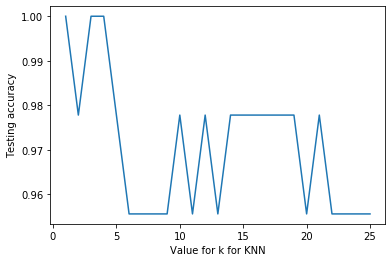

In [29]:
>>> %matplotlib inline 
>>> import matplotlib.pyplot as plt 
>>> plt.plot(k_range, score_list)
>>> plt.xlabel('Value for k for KNN')
>>> plt.ylabel('Testing accuracy')

## Step 5: Making predictions 

In [41]:
>>> knn = KNeighborsClassifier(n_neighbors=5)
>>> knn.fit(data,target)
>>> target_Classes = {0:'iris_setosa', 1:'iris_versicolor', 2:'iris_verginica'}
>>> x_new = [[4,3,1,2],
...         [5,4,1,3]]
>>> y_predict = knn.predict(x_new)
>>> print('First Predictions  -> ',target_Classes[y_predict[1]])
>>> print('Second Predictions -> ',target_Classes[y_predict[0]])

First Predictions  ->  iris_setosa
Second Predictions ->  iris_setosa


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
